<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [38]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 

In [2]:
# выгружаем датасет в переменную data
data = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')

In [3]:
# выведем общую информацию о датасете и первые 5 строк таблицы
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Признаки   
**RowNumber** — индекс строки в данных  
**CustomerId** — уникальный идентификатор клиента  
**Surname** — фамилия  
**CreditScore** — кредитный рейтинг  
**Geography** — страна проживания  
**Gender** — пол  
**Age** — возраст  
**Tenure** — сколько лет человек является клиентом банка  
**Balance** — баланс на счёте  
**NumOfProducts** — количество продуктов банка, используемых клиентом  
**HasCrCard** — наличие кредитной карты  
**IsActiveMember** — активность клиента  
**EstimatedSalary** — предполагаемая зарплата  

Целевой признак  
**Exited** — факт ухода клиента  

Только в столбце Tenure ("сколько лет человек является клиентом банка") есть пропуски, выведем уникальные значения этого столбца.

In [4]:
data['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

In [5]:
data[data['Tenure'].isna()].head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0


Учитывая, что в столбце Tenure присутствуют различные значения от 0 до 10, то логичным будет заменить пропуски на среднее значение по столбцу.

In [6]:
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].mean()).apply(np.ceil)

In [7]:
# проверим результат заполнения пропусков
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Успешно избавились от пропусков.
Все типы данных по столбцам выглядят логичными.

Подготовим данные для анализа. Преобразуем категориальные данные в численные с помощью техники прямого кодирования, избежав дамми-ловушки.
Затем разделим таблицу на признаки и целевой признак, а далее разобьём выборки на обучающую, валидационную и тестовую.

In [8]:
data_ohe = pd.get_dummies(data, drop_first=True)

In [9]:
target = data_ohe['Exited']
features = data_ohe.drop('Exited', axis=1)

In [10]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, random_state=12345, test_size=0.4, stratify = target)

In [11]:
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, random_state=12345, test_size=0.5, stratify = target_valid)

In [12]:
# проверим выборки
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)
print(target_train.shape)
print(target_valid.shape)
print(target_test.shape)

(6000, 2944)
(2000, 2944)
(2000, 2944)
(6000,)
(2000,)
(2000,)


Мы подготовили данные для дальнейшего исследования, можно переходить к обучению моделей.

## Исследование задачи

Попробуем обучить модель по имеющимся данным.   
Обучим модели алгоритмами Дерево решений, Логистической регрессии и Случайный лес и выведем метрики точности и полноты.

In [13]:
model = DecisionTreeClassifier(random_state=12345) 
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Точность', precision_score(target_valid, predicted_valid))
print('Полнота', recall_score(target_valid, predicted_valid))

Точность 0.5684210526315789
Полнота 0.5294117647058824


In [14]:
model = LogisticRegression(solver='liblinear', random_state=12345) 
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Точность', precision_score(target_valid, predicted_valid))
print('Полнота', recall_score(target_valid, predicted_valid))

Точность 0.0
Полнота 0.0


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
model = RandomForestClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Точность', precision_score(target_valid, predicted_valid))
print('Полнота', recall_score(target_valid, predicted_valid))

Точность 0.8486486486486486
Полнота 0.38480392156862747


Лучшие значения, ожидаемо, показал Случайный лес. Но мы проделали весь путь обучения на данных с дисбалансом классов.
Проверим f1-метрику.

In [16]:
model = DecisionTreeClassifier(random_state=12345) 
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5482233502538072


In [17]:
model = LogisticRegression(solver='liblinear', random_state=12345) 
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.0


In [18]:
model = RandomForestClassifier(random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.49220103986135183


На несбалансированных данных f1-мера не дотягивает даже до 0,55.
Необходимо выровнять и стандартизировать классы и добиться более высокой метрики.

## Борьба с дисбалансом

Стандартизируем данные для лучшего обучения модели.

In [19]:
# зададим переменную со списком всех численных признаков.
numeric = ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [20]:
# Создадим объект стандартизации и настроим его на обучающих данных
scaler = StandardScaler()

In [21]:
scaler.fit(features_train[numeric])

StandardScaler()

In [22]:
# преобразуем выборки функцией transform()
pd.options.mode.chained_assignment = None
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric]) 

Выполним взвешиванеи классов и расчитаем метрику f1.

In [23]:
model = LogisticRegression(solver='liblinear', random_state=12345, class_weight='balanced') 
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.49045801526717553


In [24]:
model = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5690072639225181


In [25]:
model = RandomForestClassifier(random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.4905008635578583


Значения мерики F1 невысокие. Попробуем изменить размер выборки, а также изменим гиперпараметры. И параллельно будет рассчитывать метрику ROC-AUC.

In [26]:
data['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

Количество положительных значений почти в 4 раза превышает отрицательные. Выровняем баланс классов.

In [27]:
# увеличим выборку положительных решений с помощью функции
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

С помощью циклов, поберём лучшие параметры и метрику F1.

In [44]:
%%time
best_est = 0
best_result = 0
best_depth = 0

for est in range(10, 50, 5):
    for depth in range (10, 80, 5):
        model = RandomForestClassifier(random_state=12345, criterion='entropy', max_depth=depth, n_estimators=est) 
        model.fit(features_upsampled, target_upsampled)
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_est = est
            best_result = result
            best_depth = depth
print("F1:", best_result)
print("Количество деревьев:", best_est)
print("Максимальная глубина:", best_depth)

F1: 0.570273003033367
Количество деревьев: 40
Максимальная глубина: 60
Wall time: 1min 47s


In [29]:
# рассчитаем ROC-AUC для модели Случайный лес. 
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

0.8529889028475712


In [49]:
%%time
best_result = 0
best_depth = 0
best_leaf = 0

for leaf in range(1, 5):
    for depth in range (1, 50, 5):
        model = DecisionTreeClassifier(random_state=12345, max_depth=depth, min_samples_leaf=leaf) 
        model.fit(features_upsampled, target_upsampled)
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_result = result
            best_depth = depth
            best_leaf = leaf
print("F1:", best_result)
print("Максимальная глубина:", best_depth)
print("Минимальное число объектов в листе:", best_leaf)

F1: 0.5861244019138755
Максимальная глубина: 31
Минимальное число объектов в листе: 1
Wall time: 29.7 s


Лучшее значение метрики F1 в алгоритме Случайный лес получилось при максимальной глубине дерева - 31.

In [31]:
# рассчитаем ROC-AUC для модели Дерево решений. 
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

0.7254070598088482


In [32]:
# обучим модель алгоритмом Логистическая регрессия и рассчитаем ROC-AUC. 
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

F1: 0.4780487804878049
0.7492009680756724


Лучшие значения показал алгоритм Случайного леса, худшим стал алгоритм Логистической регрессии. Постороим график ROC-AUC для лучшего алгоритма для наглядности.

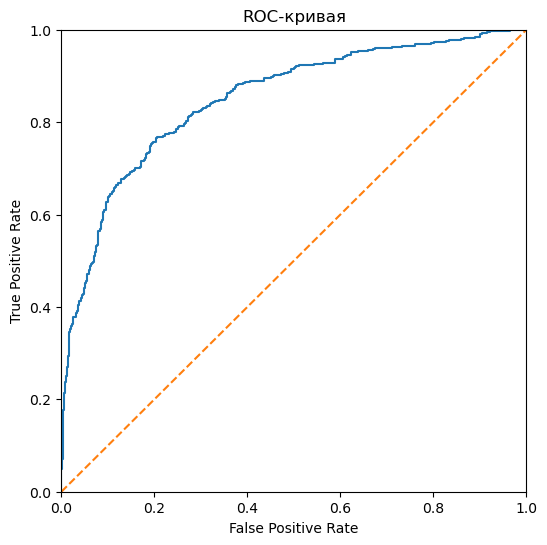

In [33]:
model = RandomForestClassifier(random_state=12345, criterion='entropy', max_depth=55, n_estimators=35)
model.fit(features_upsampled, target_upsampled)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure(figsize=(6, 6))

plt.plot(fpr, tpr)

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Лучше всего себя проявил алгоритм Случайный лес, это было ожидаемо.  
Дерево решений показало хороший результат, всего немного уступив Случайному лесу.  
Логистическая регрессия показала результат f1-метрики заметно меньше 0,59.  
Проверим модель Случайного леса на тестовой выборке.

## Тестирование модели

Проверим нашу модель на тестовой выборке.

In [40]:
%%time
model = RandomForestClassifier(random_state=12345, criterion='entropy', max_depth=55, n_estimators=35)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
print("F1:", f1_score(target_test, predicted_test))

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print(auc_roc)

F1: 0.5514018691588785
0.8171576815644612
Wall time: 5.42 s


Метрика не дотягивает 0,59 на тестовой выборке, видимо модель переобучилась на обучающей выборке. Попробуем объединить валидационную и обучающую выборки и заново обучить модель.

In [35]:
features = pd.concat([features_upsampled, features_valid])
target = pd.concat([target_upsampled, target_valid])

In [36]:
%%time
model = RandomForestClassifier(random_state=12345, criterion='entropy', max_depth=55, n_estimators=35)
model.fit(features, target)
predicted_test = model.predict(features_test)
print("F1:", f1_score(target_test, predicted_test))

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print(auc_roc)

F1: 0.5576923076923077
0.8339865289017832
Wall time: 4.51 s


Наша модель показала отличный результат, метрика f1 = 0,62.  roc_auc = 0,85

## Вывод

Мы провели исследование по данным банковского сектора. Изучили и подготовили данные для определения лучшего алгоритма и метрики F1. Изначально провели подготовку данных: устранили пропуски в данных и разбили данные на 3 выборки: обучающую, валидационную и тестовую. Затем обучили модель 3-мя видами алгоритмов на несбалансированных данных: Случайный лес, Дерево решений и Логистическая регрессия. Значения метрики F1 вышли невысокими.  
Затем поработали с дисбалансом классов, увеличив количество положительных значений в выборке. На обработанных данных, путём циклического подбора гиперпараметров, выявили лучший алгоритм (Случайный лес), параллельно рассчитывая метрику roc_auc_score.   
На тестовой выборке наша модель показала хороший результат - F1-метрика более 0,62. roc_auc = 0,85 

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*